In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df1 = pd.read_csv("New_Data.csv")

In [0]:
df = df1.drop('Unnamed: 0', axis = 1)

In [0]:
df["Day"] = df["Day"].apply(lambda x: int(x[:2]))

In [5]:
df_old = pd.read_csv("Insurance_Marketing-Customer-Value-Analysis (1).csv")
df_old['Response'] = df_old['Response'].map({'Yes': 1, 'No': 0})
from scipy import stats

def drop_numerical_outliers(df_old, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df_old.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df_old.drop(df_old.index[~constrains], inplace=True)
drop_numerical_outliers(df_old)    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The reduce argument is deprecated and will be removed in a future version. You can specify result_type='reduce' to try to reduce the result to the original dimensions
  import sys


In [0]:
def gaussian(x):
    val = 2/(1+np.exp(x))
    return val

In [0]:
df["Customer_satisfaction"] = df["Months Since Policy Inception"]*gaussian(df["Number of Open Complaints"])*np.log(1+df["Number of Policies"])

In [0]:
def normalize(df):
    result = df.copy()
    
    max_value = df.max()
    min_value = df.min()
    result = (df - min_value) / (max_value - min_value)
    return result

In [0]:
df["car_present_value"] = df_old["Coverage"].map({'Premium': 3, 'Extended': 2, 'Basic': 1})*df["Monthly Premium Auto"]*df_old['Vehicle Class'].map({'Luxury Car': 3, 'Luxury SUV': 3, 'SUV': 2, 'Sports Car':2, 'Four-Door Car':1, 'Two-Door Car':1})*df_old['Policy Type'].map({'Special Auto': 3, 'Personal Auto': 2, 'Corporate Auto': 1})
df["car_present_value"]= normalize(df["car_present_value"])

In [0]:
#df["insurance_quality"] = df_old["Coverage"].map({'Premium': 3, 'Extended': 2, 'Basic': 1})*np.log(df["Monthly Premium Auto"])*np.log(df["Total Claim Amount"])*df["Number of Policies"]

In [0]:
avg = {'California':37558.946667, 'Nevada':38369.605442, 'Oregon':37557.283353, 'Washington':38122.733083, 'Arizona':37405.402231}
df["Effective_income"] = df_old["Income"]/df_old["State"].map(avg)

In [0]:
df["Total submitted"] = df_old["Months Since Policy Inception"]*df_old["Monthly Premium Auto"]

In [0]:
df["log_income"] = np.log(df["Income"]+1)
df["log_monthly_premium"] =  np.log(df["Monthly Premium Auto"]+1)

In [14]:
df

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Day,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Policy Type_Personal Auto,Policy Type_Special Auto,Customer_satisfaction,car_present_value,Effective_income,Total submitted,log_income,log_monthly_premium
0,2763.519279,0,56274,69,32,5,0,1,384.811147,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,3.465736,0.003351,1.476127,345.0,10.938006,4.248495
1,6979.535903,0,0,94,13,42,0,8,1131.464935,31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,92.283432,0.131965,0.000000,3948.0,0.000000,4.553877
2,12887.431650,0,48767,108,18,38,0,2,566.472247,50,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,41.747267,0.245915,1.270980,4104.0,10.794830,4.691348
3,7645.861827,0,0,106,18,65,0,7,529.881344,20,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,135.163700,0.063259,0.000000,6890.0,0.000000,4.672829
4,2813.692575,0,43836,73,12,44,0,1,138.130879,34,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,30.498476,0.035610,1.149865,3212.0,10.688233,4.304065
5,8256.297800,1,62902,69,14,94,0,2,159.383042,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,103.269555,0.032258,1.674828,6486.0,11.049349,4.248495
6,5380.898636,1,55350,67,0,13,0,9,321.600000,55,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,29.933606,0.002514,1.473749,871.0,10.921450,4.219508
7,7216.100311,0,0,101,0,68,0,4,363.029680,18,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,109.441778,0.101382,0.000000,6868.0,0.000000,4.624973
8,24127.504020,1,14072,71,13,3,0,2,511.200000,26,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3.295837,0.004189,0.374681,213.0,9.552013,4.276666
9,7388.178085,0,28812,93,17,7,0,8,425.527834,48,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,15.380572,0.208211,0.767148,651.0,10.268582,4.543295


In [15]:
df_old

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,1,Basic,Bachelor,1/25/2011,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,1,Basic,College,2/24/2011,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,0,Premium,Master,1/18/2011,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,1,Basic,Bachelor,1/26/2011,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,0,Extended,College,2/17/2011,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [0]:
df["Customer_wellbeing"] = df_old["Marital Status"].map({'Married': 2, 'Single': 1, 'Divorced': 1})*df_old["EmploymentStatus"].map({'Employed': 2, 'Unemployed': 1, 'Medical Leave': 1, 'Disabled': 1, 'Retired':1})
df["Customer_status"] = df_old["Location Code"].map({'Urban': 3, 'Suburban': 2, 'Rural': 1})*df_old["Education"].map({'Bachelor': 2, 'College': 1, 'High School or Below': 1, 'Doctor':3, 'Master':3})*df_old["EmploymentStatus"].map({'Employed': 2, 'Unemployed': 1, 'Medical Leave': 1, 'Disabled': 1, 'Retired':1})

In [0]:
df["already_claimed"] = df["Monthly Premium Auto"]*df["Months Since Last Claim"]*df["Number of Policies"]-df["Total Claim Amount"]
df=df.clip(lower=0)

In [18]:
df

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Day,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Policy Type_Personal Auto,Policy Type_Special Auto,Customer_satisfaction,car_present_value,Effective_income,Total submitted,log_income,log_monthly_premium,Customer_wellbeing,Customer_status,already_claimed
0,2763.519279,0,56274,69,32,5,0,1,384.811147,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,3.465736,0.003351,1.476127,345.0,10.938006,4.248495,4.0,8.0,1823.188853
1,6979.535903,0,0,94,13,42,0,8,1131.464935,31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,92.283432,0.131965,0.000000,3948.0,0.000000,4.553877,1.0,4.0,8644.535065
2,12887.431650,0,48767,108,18,38,0,2,566.472247,50,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,41.747267,0.245915,1.270980,4104.0,10.794830,4.691348,4.0,8.0,3321.527753
3,7645.861827,0,0,106,18,65,0,7,529.881344,20,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,135.163700,0.063259,0.000000,6890.0,0.000000,4.672829,2.0,4.0,12826.118656
4,2813.692575,0,43836,73,12,44,0,1,138.130879,34,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,30.498476,0.035610,1.149865,3212.0,10.688233,4.304065,2.0,4.0,737.869121
5,8256.297800,1,62902,69,14,94,0,2,159.383042,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,103.269555,0.032258,1.674828,6486.0,11.049349,4.248495,4.0,4.0,1772.616958
6,5380.898636,1,55350,67,0,13,0,9,321.600000,55,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,29.933606,0.002514,1.473749,871.0,10.921450,4.219508,4.0,4.0,0.000000
7,7216.100311,0,0,101,0,68,0,4,363.029680,18,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,109.441778,0.101382,0.000000,6868.0,0.000000,4.624973,1.0,9.0,0.000000
8,24127.504020,1,14072,71,13,3,0,2,511.200000,26,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3.295837,0.004189,0.374681,213.0,9.552013,4.276666,1.0,4.0,1334.800000
9,7388.178085,0,28812,93,17,7,0,8,425.527834,48,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,15.380572,0.208211,0.767148,651.0,10.268582,4.543295,4.0,6.0,12222.472166


In [0]:
df.fillna(value=0,inplace=True)

In [20]:
df

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Day,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Policy Type_Personal Auto,Policy Type_Special Auto,Customer_satisfaction,car_present_value,Effective_income,Total submitted,log_income,log_monthly_premium,Customer_wellbeing,Customer_status,already_claimed
0,2763.519279,0,56274,69,32,5,0,1,384.811147,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,3.465736,0.003351,1.476127,345.0,10.938006,4.248495,4.0,8.0,1823.188853
1,6979.535903,0,0,94,13,42,0,8,1131.464935,31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,92.283432,0.131965,0.000000,3948.0,0.000000,4.553877,1.0,4.0,8644.535065
2,12887.431650,0,48767,108,18,38,0,2,566.472247,50,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,41.747267,0.245915,1.270980,4104.0,10.794830,4.691348,4.0,8.0,3321.527753
3,7645.861827,0,0,106,18,65,0,7,529.881344,20,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,135.163700,0.063259,0.000000,6890.0,0.000000,4.672829,2.0,4.0,12826.118656
4,2813.692575,0,43836,73,12,44,0,1,138.130879,34,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,30.498476,0.035610,1.149865,3212.0,10.688233,4.304065,2.0,4.0,737.869121
5,8256.297800,1,62902,69,14,94,0,2,159.383042,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,103.269555,0.032258,1.674828,6486.0,11.049349,4.248495,4.0,4.0,1772.616958
6,5380.898636,1,55350,67,0,13,0,9,321.600000,55,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,29.933606,0.002514,1.473749,871.0,10.921450,4.219508,4.0,4.0,0.000000
7,7216.100311,0,0,101,0,68,0,4,363.029680,18,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,109.441778,0.101382,0.000000,6868.0,0.000000,4.624973,1.0,9.0,0.000000
8,24127.504020,1,14072,71,13,3,0,2,511.200000,26,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3.295837,0.004189,0.374681,213.0,9.552013,4.276666,1.0,4.0,1334.800000
9,7388.178085,0,28812,93,17,7,0,8,425.527834,48,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,15.380572,0.208211,0.767148,651.0,10.268582,4.543295,4.0,6.0,12222.472166


In [0]:
df['Income']=normalize(np.log(df['Income']+1))
df['Total Claim Amount']=normalize(np.log(df['Total Claim Amount']+1))
df['Customer_satisfaction']=normalize(np.log(df['Customer_satisfaction']+1))
#df['insurance_quality']=normalize(np.log(df['insurance_quality']+1))
df['Total submitted']=normalize(np.log(df['Total submitted']+1))
df['already_claimed']=normalize(np.log(df['already_claimed']+1))

In [22]:
df

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Day,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Policy Type_Personal Auto,Policy Type_Special Auto,Customer_satisfaction,car_present_value,Effective_income,Total submitted,log_income,log_monthly_premium,Customer_wellbeing,Customer_status,already_claimed
0,2763.519279,0,0.950078,69,32,5,0,1,0.827755,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0.275407,0.003351,1.476127,0.593992,10.938006,4.248495,4.0,8.0,0.691587
1,6979.535903,0,0.000000,94,13,42,0,8,0.979834,31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.834751,0.131965,0.000000,0.841363,0.000000,4.553877,1.0,4.0,0.834890
2,12887.431650,0,0.937642,108,18,38,0,2,0.882248,50,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0.691136,0.245915,1.270980,0.845299,10.794830,4.691348,4.0,8.0,0.746811
3,7645.861827,0,0.000000,106,18,65,0,7,0.872835,20,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.904358,0.063259,0.000000,0.897929,0.000000,4.672829,2.0,4.0,0.871226
4,2813.692575,0,0.928383,73,12,44,0,1,0.683707,34,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.634935,0.035610,1.149865,0.820407,10.688233,4.304065,2.0,4.0,0.608348
5,8256.297800,1,0.959749,69,14,94,0,2,0.703783,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0.855241,0.032258,1.674828,0.891790,11.049349,4.248495,4.0,4.0,0.688998
6,5380.898636,1,0.948640,67,0,13,0,9,0.802483,55,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.631605,0.002514,1.473749,0.687905,10.921450,4.219508,4.0,4.0,0.000000
7,7216.100311,0,0.000000,101,0,68,0,4,0.819547,18,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.865826,0.101382,0.000000,0.897604,0.000000,4.624973,1.0,9.0,0.000000
8,24127.504020,1,0.829690,71,13,3,0,2,0.867775,26,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.268269,0.004189,0.374681,0.545177,9.552013,4.276666,1.0,4.0,0.662888
9,7388.178085,0,0.891932,93,17,7,0,8,0.841925,48,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0.514600,0.208211,0.767148,0.658366,10.268582,4.543295,4.0,6.0,0.866786


In [0]:
df['Customer_wellbeing']=normalize(df['Customer_wellbeing'])
df['Customer_status']=normalize(df['Customer_status'])
df['log_monthly_premium']=normalize(df['log_monthly_premium'])
df['log_income']=normalize(df['log_income'])
df['Effective_income']=normalize(df['Effective_income'])
df['Monthly Premium Auto']=normalize(df['Monthly Premium Auto'])	
df['Months Since Last Claim']=normalize(df['Months Since Last Claim'])
df['Months Since Policy Inception']=normalize(df['Months Since Policy Inception'])
df['Number of Open Complaints']=normalize(df['Number of Open Complaints'])
df['Number of Policies']=normalize(df['Number of Policies'])	

In [0]:
df
df=df[(df.Day!=28)&(df.Day!=29)&(df.Day!=30)&(df.Day!=31)&(df.Day!=58)&(df.Day!=59)]

In [25]:
df

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Day,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Policy Type_Personal Auto,Policy Type_Special Auto,Customer_satisfaction,car_present_value,Effective_income,Total submitted,log_income,log_monthly_premium,Customer_wellbeing,Customer_status,already_claimed
0,2763.519279,0,0.950078,0.059259,0.914286,0.050505,0.000000,0.000,0.827755,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0.275407,0.003351,0.553008,0.593992,0.950078,0.104977,1.00,0.444444,0.691587
2,12887.431650,0,0.937642,0.348148,0.514286,0.383838,0.000000,0.125,0.882248,50,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0.691136,0.245915,0.476153,0.845299,0.937642,0.488045,1.00,0.444444,0.746811
3,7645.861827,0,0.000000,0.333333,0.514286,0.656566,0.000000,0.750,0.872835,20,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.904358,0.063259,0.000000,0.897929,0.000000,0.472026,0.50,0.222222,0.871226
4,2813.692575,0,0.928383,0.088889,0.342857,0.444444,0.000000,0.000,0.683707,34,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.634935,0.035610,0.430779,0.820407,0.928383,0.153045,0.50,0.222222,0.608348
5,8256.297800,1,0.959749,0.059259,0.400000,0.949495,0.000000,0.125,0.703783,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0.855241,0.032258,0.627449,0.891790,0.959749,0.104977,1.00,0.222222,0.688998
6,5380.898636,1,0.948640,0.044444,0.000000,0.131313,0.000000,1.000,0.802483,55,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.631605,0.002514,0.552117,0.687905,0.948640,0.079903,1.00,0.222222,0.000000
7,7216.100311,0,0.000000,0.296296,0.000000,0.686869,0.000000,0.375,0.819547,18,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.865826,0.101382,0.000000,0.897604,0.000000,0.430630,0.25,0.500000,0.000000
8,24127.504020,1,0.829690,0.074074,0.371429,0.030303,0.000000,0.125,0.867775,26,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.268269,0.004189,0.140369,0.545177,0.829690,0.129345,0.25,0.222222,0.662888
9,7388.178085,0,0.891932,0.237037,0.485714,0.070707,0.000000,0.875,0.841925,48,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0.514600,0.208211,0.287400,0.658366,0.891932,0.359979,1.00,0.333333,0.866786
10,4738.992022,0,0.000000,0.044444,0.657143,0.050505,0.000000,0.250,0.859602,52,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0.381122,0.030582,0.000000,0.591012,0.000000,0.079903,0.25,0.111111,0.767106


In [26]:
! pip3 install catboost

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [28]:
y=df['Customer Lifetime Value']
#X=df.drop(['Customer Lifetime Value'],axis=1)
X=df[['Monthly Premium Auto','Number of Policies','Income','already_claimed','Total Claim Amount','Months Since Last Claim']]
#random_state is the seed used by the random number generator, it can be any integer.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,test_size = 0.2, random_state=100)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [29]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import explained_variance_score as evs
lr = RandomForestRegressor(bootstrap= True,max_depth= 20,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 10,n_estimators= 100)
rfecv = RFECV(lr, min_features_to_select = 3)
rfecv.fit(X_train, y_train)
attr = [i for i in range(len(X_train.columns.values)) if rfecv.ranking_[i] == 1]
print(X_train.columns.values[attr])
X_train_new = X_train[X_train.columns.values[attr]]
X_test_new = X_test[X_train.columns.values[attr]]
lr.fit(X_train_new,y_train)
y_train_pred=lr.predict(X_train_new)
y_test_pred =lr.predict(X_test_new)
print("EVS Accuracy: "+str(evs(y_test, y_test_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


['Monthly Premium Auto' 'Number of Policies' 'Income' 'already_claimed'
 'Total Claim Amount' 'Months Since Last Claim']
EVS Accuracy: 0.7580853223756905


In [30]:
lr = RandomForestRegressor(bootstrap= True,max_depth= 20,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 10,n_estimators= 100)
param_grid = {
    'bootstrap': [True],
    'max_depth': [100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100]
}
CV_rfc = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
y_train_pred=CV_rfc.predict(X_train)
y_test_pred=CV_rfc.predict(X_test)
#lr.fit(X_train,y_train)
#y_train_pred=lr.predict(X_train)
#y_test_pred =lr.predict(X_test)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
from sklearn.metrics import explained_variance_score as evs
print("EVS Accuracy: "+str(evs(y_test, y_test_pred)))


2316.084299082508
1778.1018551893485
EVS Accuracy: 0.7629759166203393


In [31]:
lr = RandomForestRegressor(bootstrap= True,max_depth= 20,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 10,n_estimators= 100)
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred =lr.predict(X_test)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
from sklearn.metrics import explained_variance_score as evs
print("EVS Accuracy: "+str(evs(y_test, y_test_pred)))

2315.3623487831173
1681.0947785615656
EVS Accuracy: 0.7632216138192722


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score as evs

# Train Model
print("Train CatBoost Decision Tree")
cb_model = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train, y_train,use_best_model=True,
             verbose=True)

# # Feature Importance
# fea_imp = pd.DataFrame({'imp': cb_model.feature_importances_, 'col': X.columns})
# fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
# _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
# plt.savefig('catboost_feature_importance.png')   

print("Model Evaluation Stage")
print(cb_model.get_params())
print('RMSE:', np.sqrt(mean_squared_error(y_test, cb_model.predict(X_test))))
catpred = cb_model.predict(X_test)
print("EVS Accuracy: "+str(evs(y_test, cb_model.predict(X_test))))

Train CatBoost Decision Tree
0:	learn: 8546.6935231	total: 49.8ms	remaining: 34.8s


You should provide test set for use best model. use_best_model parameter has been switched to false value.


75:	learn: 3228.6191537	total: 9.71s	remaining: 1m 19s
150:	learn: 2583.2270344	total: 24.5s	remaining: 1m 29s
225:	learn: 2504.8875424	total: 36.7s	remaining: 1m 17s
300:	learn: 2475.6910674	total: 47.6s	remaining: 1m 3s
375:	learn: 2469.8608344	total: 52.4s	remaining: 45.2s
450:	learn: 2469.5145811	total: 53.1s	remaining: 29.3s
525:	learn: 2469.4465006	total: 53.4s	remaining: 17.7s
600:	learn: 2469.4306677	total: 53.6s	remaining: 8.84s
675:	learn: 2469.4263788	total: 53.9s	remaining: 1.91s
699:	learn: 2465.7512819	total: 54.7s	remaining: 0us
Model Evaluation Stage
{'bagging_temperature': 0.2, 'eval_metric': 'RMSE', 'metric_period': 75, 'random_seed': 23, 'od_type': 'Iter', 'od_wait': 100, 'loss_function': 'RMSE', 'depth': 12, 'learning_rate': 0.02, 'iterations': 700}
RMSE: 2464.0523560494316
EVS Accuracy: 0.7317156419163384


In [33]:
! pip3 install bayesian-optimization

In [0]:
from bayes_opt import BayesianOptimization
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=65, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [35]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -2.658e+0 |  0.4509   |  0.5779   |  5.038    |
|  2        | -2.676e+0 |  0.3479   |  0.1813   |  3.038    |
|  3        | -2.536e+0 |  0.683    |  0.2317   |  5.298    |
|  4        | -2.546e+0 |  0.6918   |  0.4556   |  6.88     |
|  5        | -2.683e+0 |  0.445    |  0.9841   |  6.988    |
|  6        | -2.536e+0 |  0.7859   |  0.9284   |  5.807    |
|  7        | -2.544e+0 |  0.7598   |  0.3501   |  4.955    |
|  8        | -2.536e+0 |  0.6746   |  0.224    |  5.309    |


In [0]:
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

In [37]:
from sklearn.metrics import mean_squared_error
# Train a new model with the best parameters from the search
model2 = xgb.train(params, dtrain, num_boost_round=100)

# Predict on testing and training set
y_pred = model2.predict(dtest)
y_train_pred = model2.predict(dtrain)

# Report testing and training RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

2358.590380865454
1634.427968476462


EVS Accuracy: 0.7541941600340136


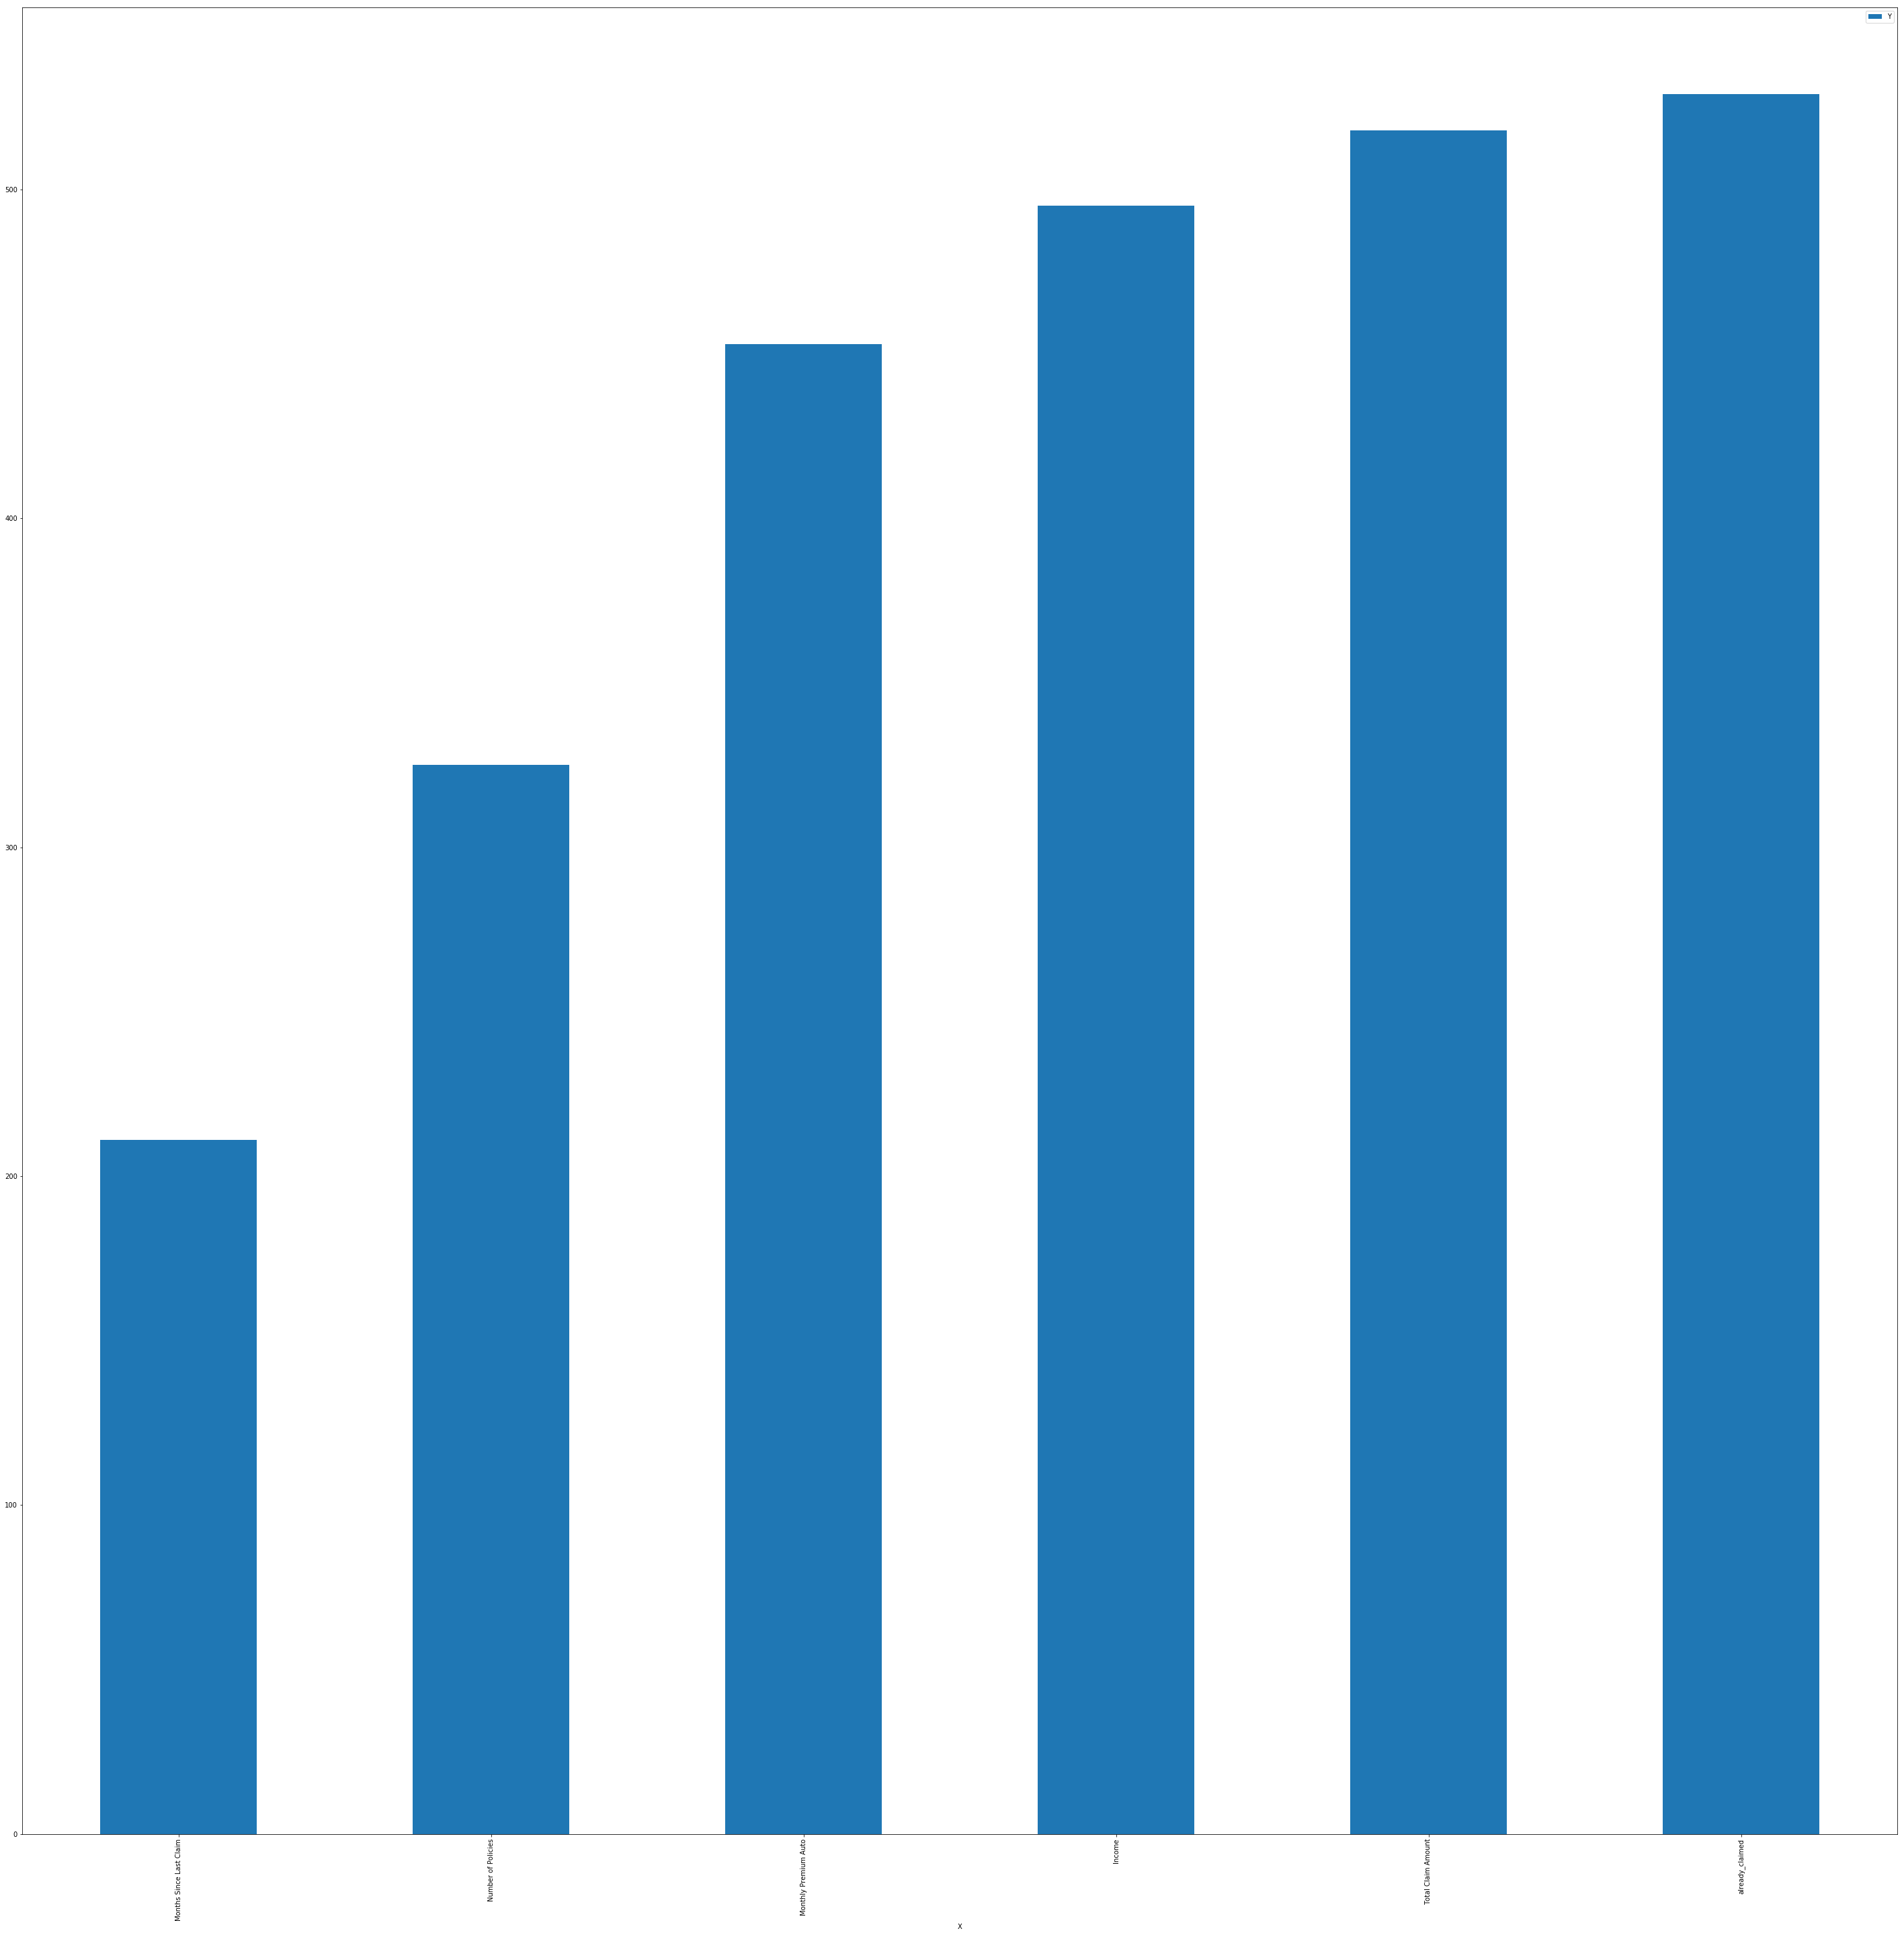

In [38]:
from sklearn.metrics import explained_variance_score as evs
from matplotlib.pyplot import figure

print("EVS Accuracy: "+str(evs(y_test, y_pred)))
fscores = pd.DataFrame({'X': list(model2.get_fscore().keys()), 'Y': list(model2.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X',figsize=(50,50))